In [1]:
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cufflinks as cf
cf.go_offline(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib 
import platform
if platform.system() == 'Windows': matplotlib.rc('font', family='Malgun Gothic')

In [2]:
# 학교 데이터 불러오기
sch = pd.read_csv("./sch.csv", index_col=0)
# 주민등록인구 데이터 불러오기
pop = pd.read_csv("./final_seoul_jumin.csv", index_col=0)

In [3]:
sch.head()

,시군구코드,행정구역(구별),학교명,도로명주소,설립일자
ID,,,,,
0,11215.0,광진구,선화예술중학교,서울특별시 광진구 천호대로 664,19731201
1,11200.0,성동구,서울숭신초등학교,서울특별시 성동구 마장로 161,19590403
2,11200.0,성동구,행당중학교,서울특별시 성동구 왕십리로 189,19680806
3,11200.0,성동구,한양대학교사범대학부속중학교,서울특별시 성동구 마조로 42,19600118
4,11215.0,광진구,자양중학교,서울특별시 광진구 뚝섬로41길 33,19840301


In [8]:
sch = sch[['행정구역(구별)', '학교명', '도로명주소']]

In [9]:
sch_gu = (sch['행정구역(구별)']).value_counts()
sch_gu

노원구     302
강서구     254
관악구     244
은평구     229
종로구     207
강남구     206
중구      176
성북구     168
송파구     168
마포구     165
구로구     135
양천구     135
서초구     129
동작구     129
용산구     126
강동구     125
동대문구    121
광진구     121
성동구     116
영등포구    115
중랑구      95
금천구      90
강북구      89
도봉구      87
서대문구     69
Name: 행정구역(구별), dtype: int64

In [11]:
sch = pd.DataFrame(sch_gu)
sch = sch.reset_index()

In [30]:
sch.columns = ['행정구역(구별)', '학교개수']
sch

,행정구역(구별),학교개수
0,노원구,302
1,강서구,254
2,관악구,244
3,은평구,229
4,종로구,207
5,강남구,206
6,중구,176
7,성북구,168
8,송파구,168
9,마포구,165


In [6]:
# del pop['ID']
pop

,행정구역별(구별),시군구코드,연령대,2017남자인구,2017여자인구,2017총인구,2018남자인구,2018여자인구,2018총인구,2019남자인구,2019여자인구,2019총인구
0,종로구,11110,10대미만,4576.0,4427.0,9003.0,4380.0,4208.0,8588.0,4143.0,4068.0,8211.0
1,종로구,11110,10대,6586.0,6392.0,12978.0,6258.0,6125.0,12383.0,5932.0,5816.0,11748.0
2,종로구,11110,20대,12163.0,11744.0,23907.0,11927.0,11838.0,23765.0,11684.0,11888.0,23572.0
3,종로구,11110,30대,10650.0,10783.0,21433.0,10523.0,10708.0,21231.0,10086.0,10290.0,20376.0
4,종로구,11110,40대,12263.0,12809.0,25072.0,11606.0,12243.0,23849.0,11222.0,11855.0,23077.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245,강동구,11740,50대,35382.0,37419.0,72801.0,34559.0,36458.0,71017.0,34594.0,36449.0,71043.0
246,강동구,11740,60대,25366.0,27062.0,52428.0,26016.0,28166.0,54182.0,27511.0,30262.0,57773.0
247,강동구,11740,70대,11871.0,12756.0,24627.0,12714.0,13563.0,26277.0,13749.0,14661.0,28410.0
248,강동구,11740,80대,2782.0,5754.0,8536.0,3104.0,5826.0,8930.0,3487.0,6125.0,9612.0


In [18]:
# pop = pop[pop['연령대'] == '10대']
# pop

In [21]:
pop= pop[['행정구역별(구별)', '2017총인구', '2018총인구', '2019총인구']]
pop

,행정구역별(구별),2017총인구,2018총인구,2019총인구
0,종로구,12978.0,12383.0,11748.0
1,중구,8129.0,7693.0,7308.0
2,용산구,18008.0,17149.0,16391.0
3,성동구,23854.0,22969.0,21435.0
4,광진구,30875.0,29234.0,27573.0
5,동대문구,27914.0,26533.0,25227.0
6,중랑구,32554.0,30589.0,28532.0
7,성북구,41755.0,40086.0,39102.0
8,강북구,26814.0,25261.0,23660.0
9,도봉구,31653.0,29699.0,27731.0


In [22]:
pop['평균10대인구'] = (pop['2017총인구'] + pop['2018총인구'] + pop['2019총인구']) / 3

In [25]:
# pop = pop[['행정구역별(구별)', '평균10대인구']]
# pop.round(2)
pop.columns = ['행정구역(구별)', '평균10대인구']

In [28]:
pop = pop.round(2)
pop

,행정구역(구별),평균10대인구
0,종로구,12369.67
1,중구,7710.00
2,용산구,17182.67
3,성동구,22752.67
4,광진구,29227.33
5,동대문구,26558.00
6,중랑구,30558.33
7,성북구,40314.33
8,강북구,25245.00
9,도봉구,29694.33


In [31]:
fin = pd.merge(sch, pop, left_on='행정구역(구별)', right_on='행정구역(구별)', how='inner')
fin

,행정구역(구별),학교개수,평균10대인구
0,노원구,302,60428.00
1,강서구,254,49549.33
2,관악구,244,32541.33
3,은평구,229,42843.33
4,종로구,207,12369.67
5,강남구,206,61456.33
6,중구,176,7710.00
7,성북구,168,40314.33
8,송파구,168,63492.00
9,마포구,165,30778.00


Text(302, 60428.0, '노원구')

Text(254, 49549.33, '강서구')

Text(244, 32541.33, '관악구')

Text(229, 42843.33, '은평구')

Text(207, 12369.67, '종로구')

Text(206, 61456.33, '강남구')

Text(176, 7710.0, '중구')

Text(168, 40314.33, '성북구')

Text(168, 63492.0, '송파구')

Text(165, 30778.0, '마포구')

Text(135, 32704.67, '구로구')

Text(135, 55007.33, '양천구')

Text(129, 46964.0, '서초구')

Text(129, 30552.67, '동작구')

Text(126, 17182.67, '용산구')

Text(125, 39651.33, '강동구')

Text(121, 26558.0, '동대문구')

Text(121, 29227.33, '광진구')

Text(116, 22752.67, '성동구')

Text(115, 26206.0, '영등포구')

Text(95, 30558.33, '중랑구')

Text(90, 16995.33, '금천구')

Text(89, 25245.0, '강북구')

Text(87, 29694.33, '도봉구')

Text(69, 25667.33, '서대문구')

Text(0.5, 0, '2017년-2019년 서울시 구별 평균 학교 개수')

Text(0, 0.5, '2017년-2019년 서울시 구별 평균 10대 인구')

Text(0.5, 1.0, '2017년-2019년 서울시 구별 평균 학교 개수와 10대 인구 산점도')

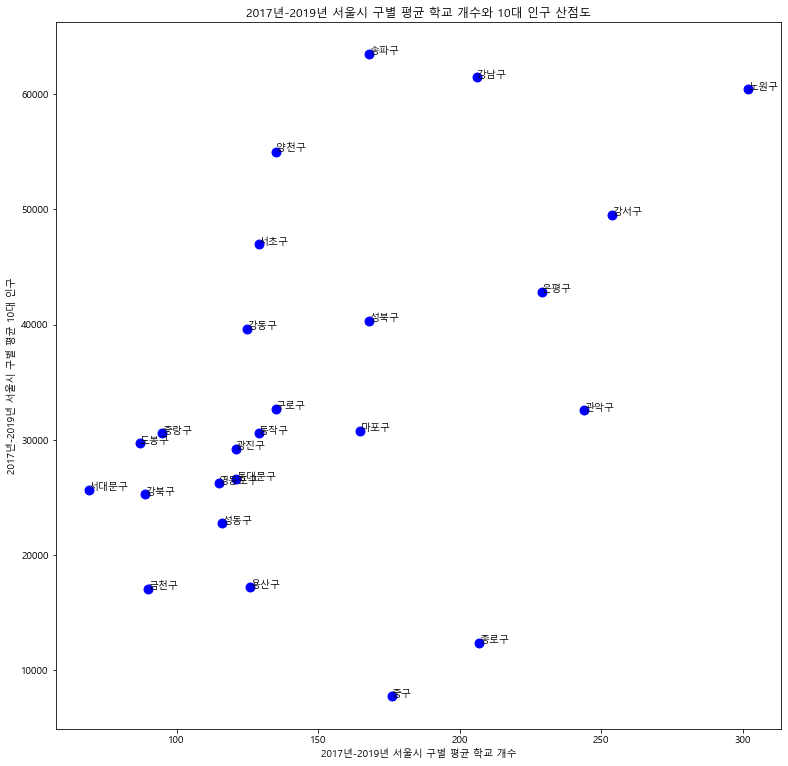

In [32]:
fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(
fin["학교개수"], 
fin["평균10대인구"],
color='b'
,s=80, 
)
plt.gcf().set_size_inches((13, 13)) 

for i, txt in enumerate(fin["행정구역(구별)"]):
    plt.annotate(txt, (fin["학교개수"][i], fin["평균10대인구"] [i]))

ax.set_xlabel("2017년-2019년 서울시 구별 평균 학교 개수")
ax.set_ylabel('2017년-2019년 서울시 구별 평균 10대 인구')
ax.set_title("2017년-2019년 서울시 구별 평균 학교 개수와 10대 인구 산점도")